In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("Cleaned_CarPrice_Data.csv")

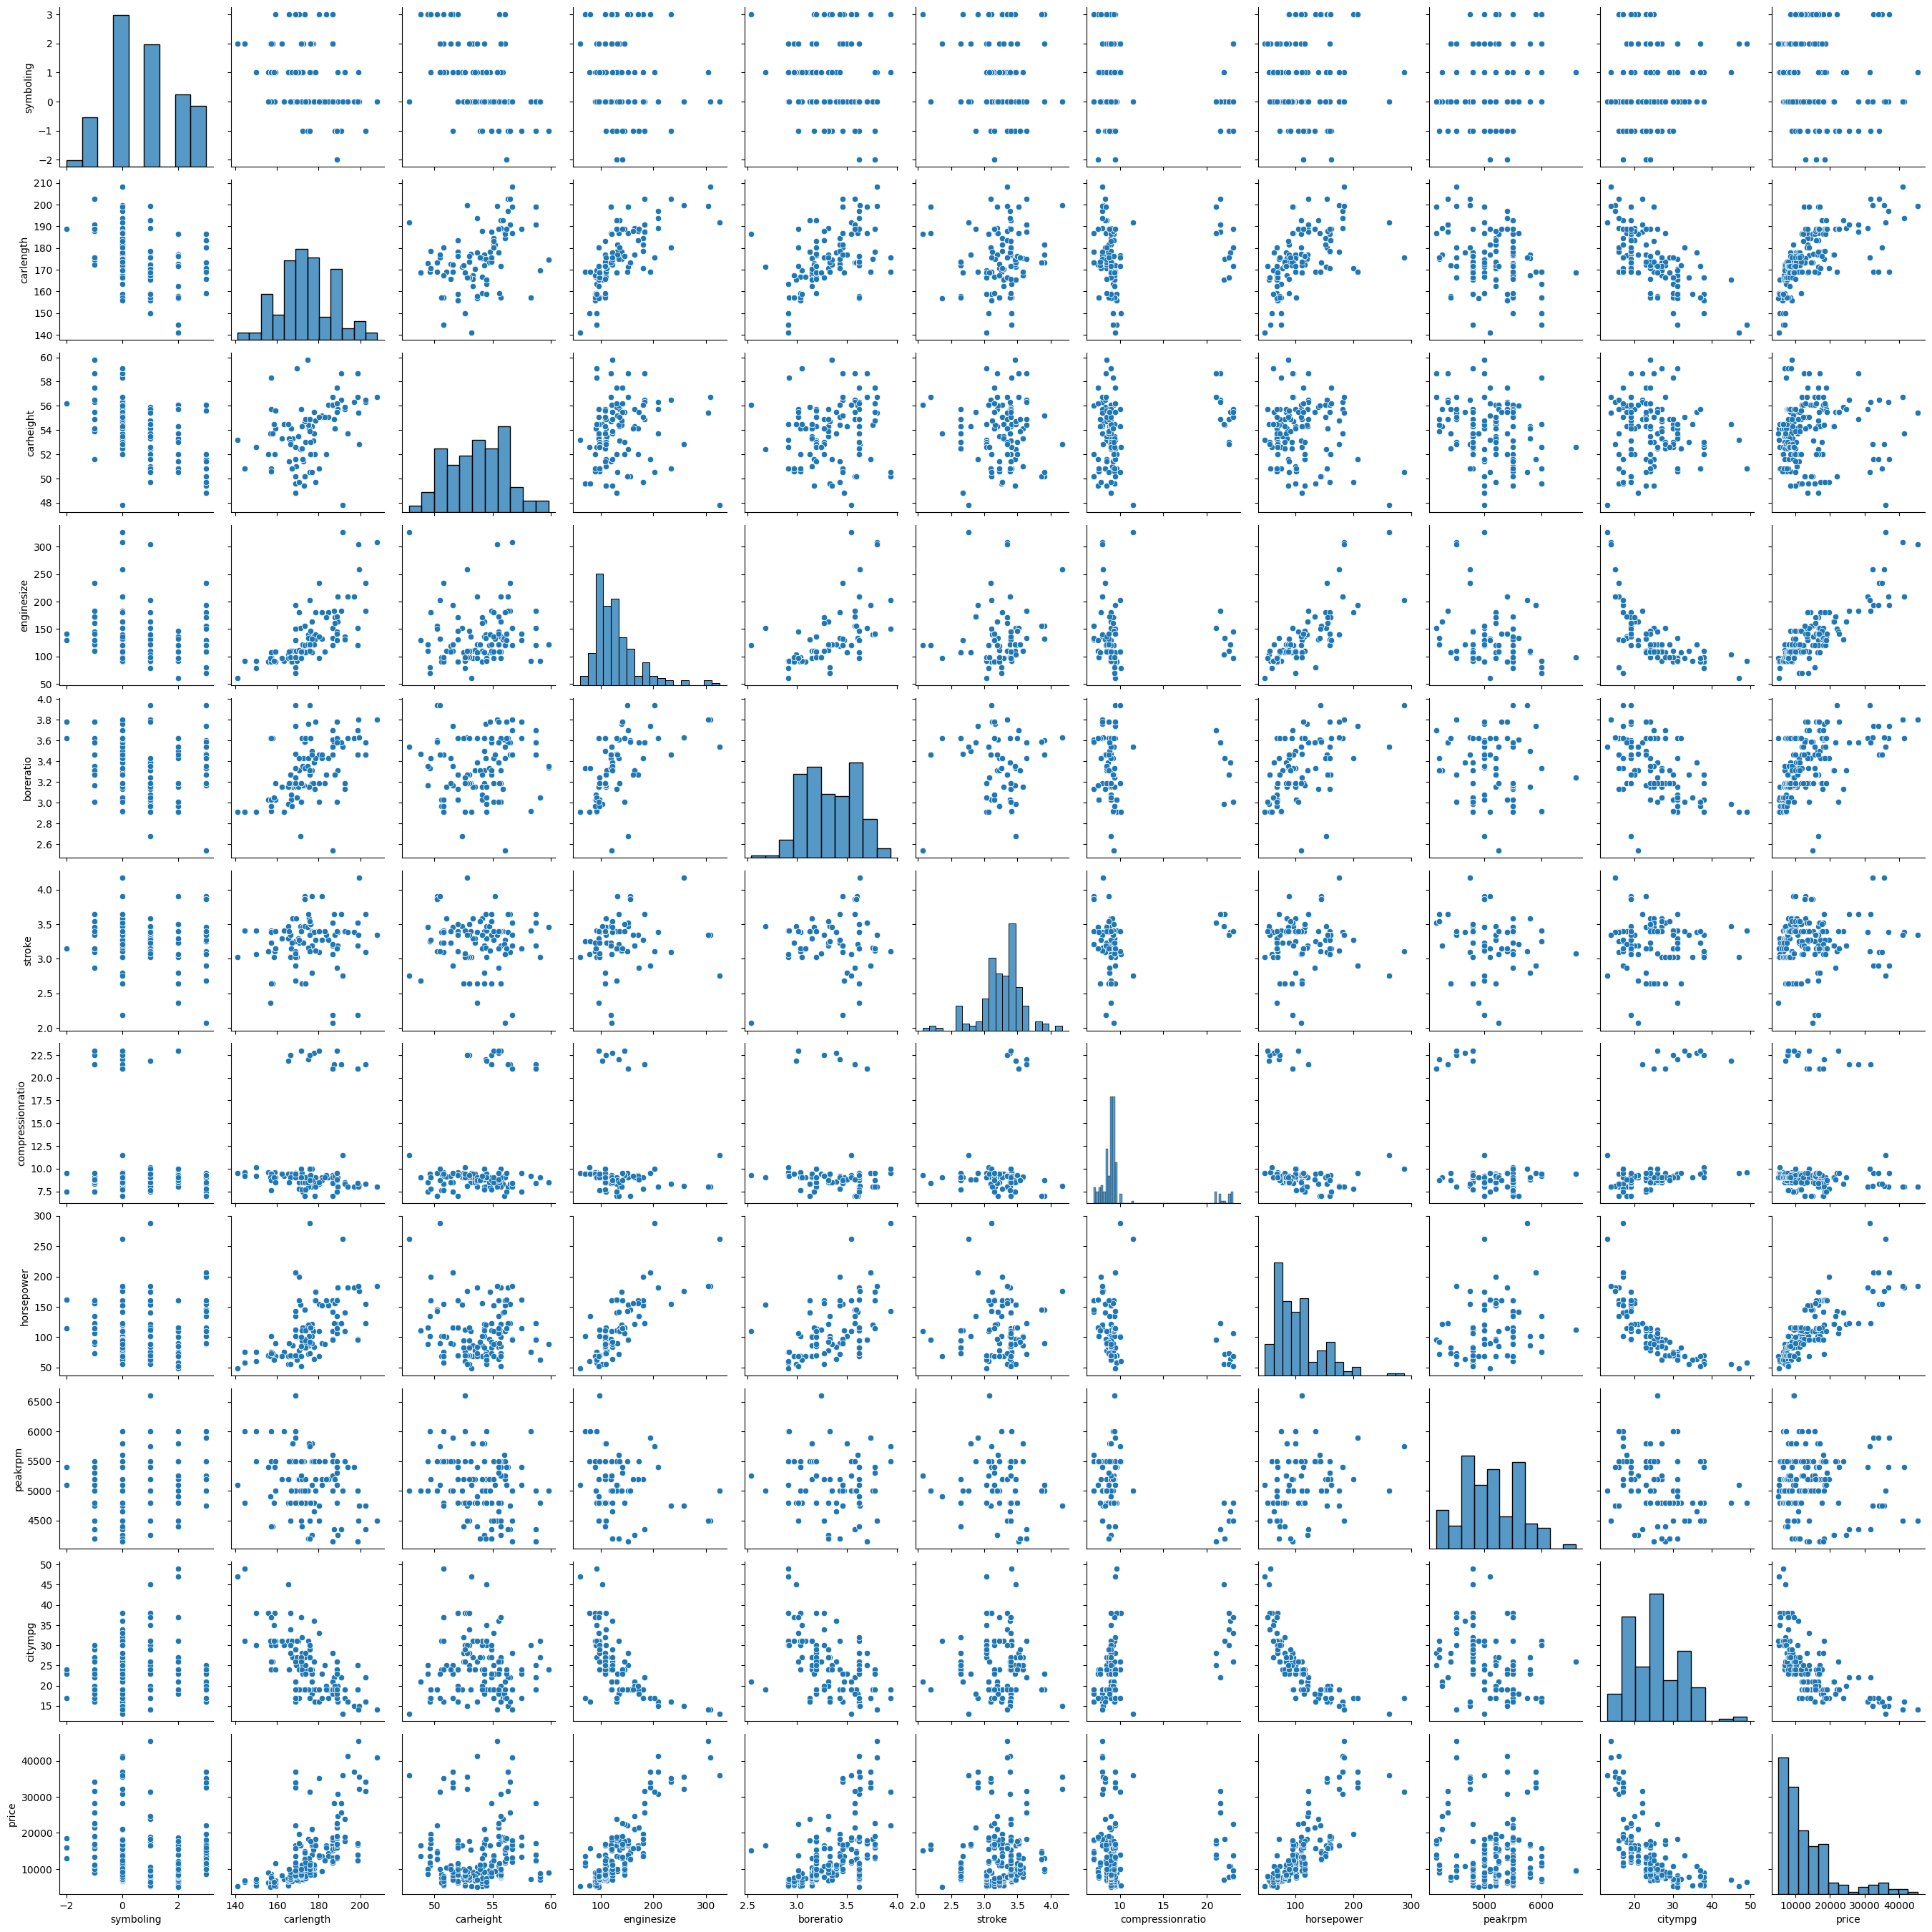

In [5]:
sns.pairplot(df)
plt.show()

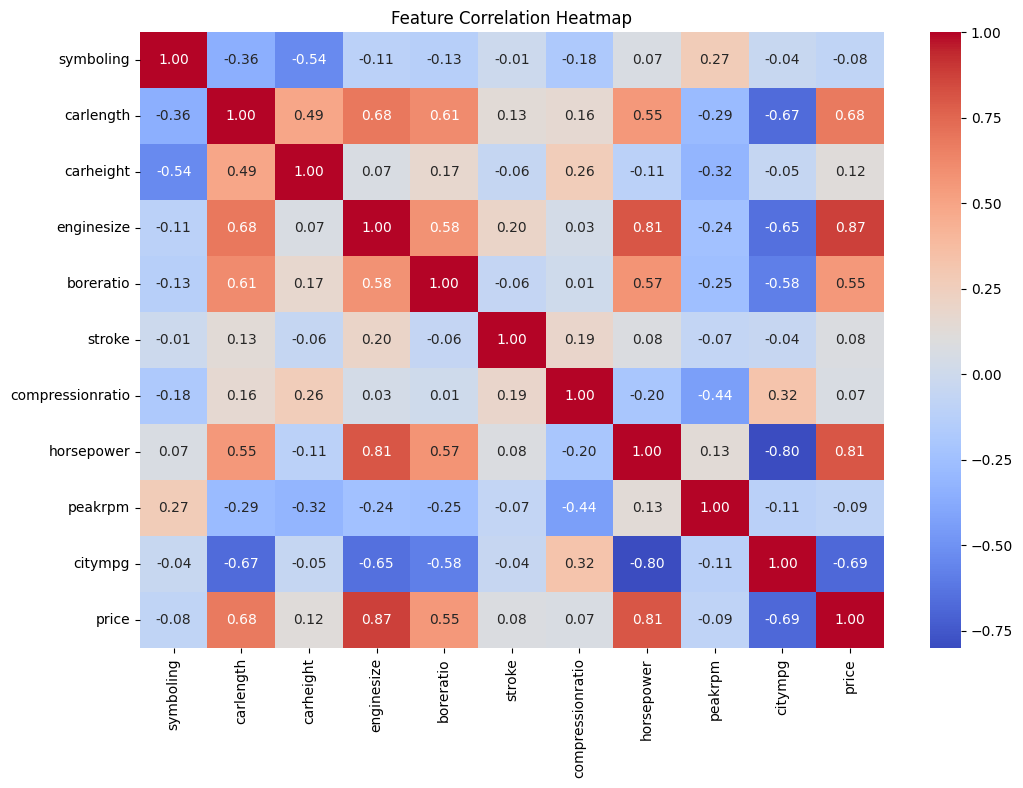

In [6]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

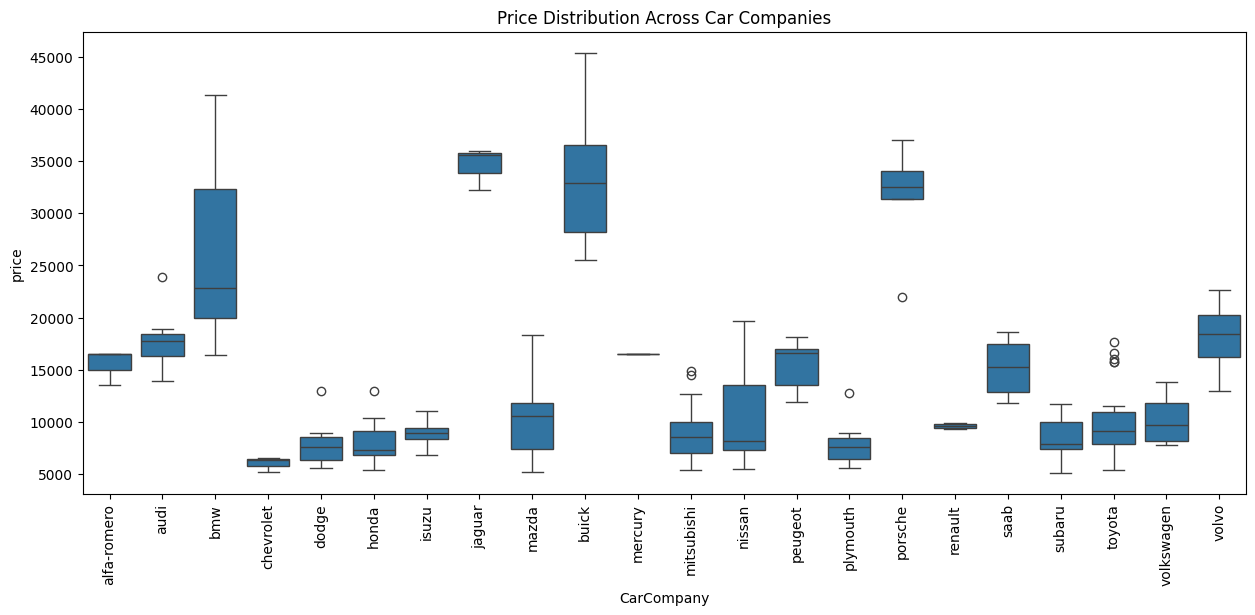

In [7]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="CarCompany", y="price", data=df)
plt.xticks(rotation=90)
plt.title("Price Distribution Across Car Companies")
plt.show()

In [8]:
df.isnull().sum()
df.dropna(inplace=True) 

In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['price']) 
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.9062887404668466
MSE: 7397943.629244281


<Axes: >

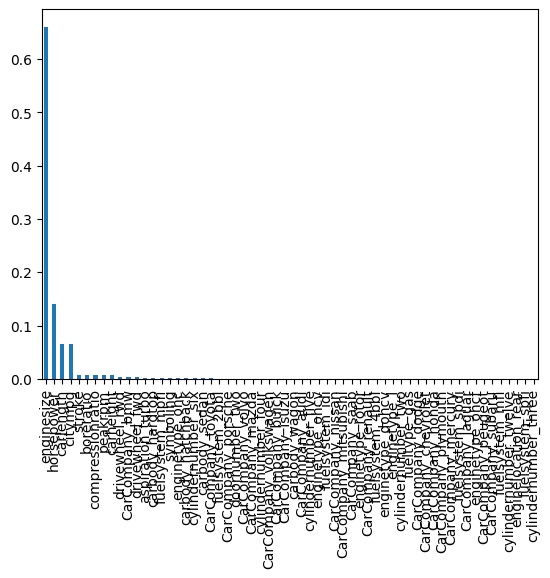

In [13]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar")

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)  
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\nithi\anaconda3\lib\site-packages\mlops-0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [17]:
from sklearn.model_selection import train_test_split

# Assuming df is your dataset and 'price' is the target variable
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize and train the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"MSE: {mse}")


R² Score: 0.946178421467545
MSE: 4248891.819442261


In [24]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

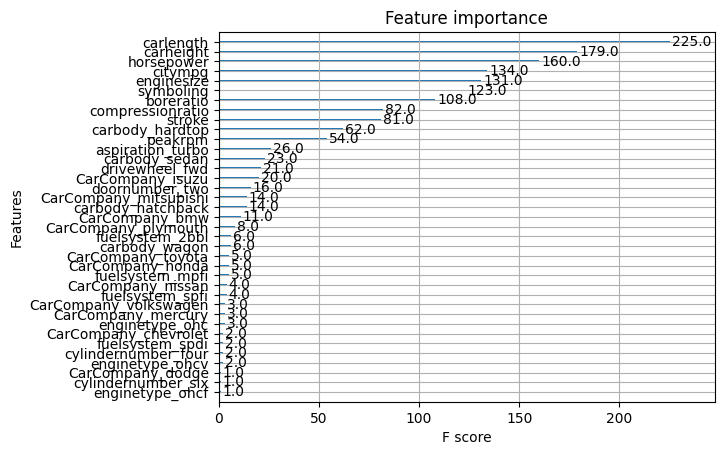

In [25]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.show()

In [26]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBRegressor()
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='r2', cv=3, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"Best R² Score: {r2_best}")
print(f"Best MSE: {mse_best}")

Best R² Score: 0.9456725494436041
Best MSE: 4288827.3910626825


In [27]:
import joblib

# Save model
joblib.dump(best_model, 'car_price_model.pkl')

# Load model (when needed)
loaded_model = joblib.load('car_price_model.pkl')


In [29]:
print(X_train.shape[1])  # Should print 60 (or the number used in training)


60


In [30]:
import numpy as np
new_data = np.zeros((1, X_train.shape[1]))  
new_data[0, 0] = 2018  # Example: Manufacturing Year
new_data[0, 1] = 50000  # Example: Mileage
new_data[0, 2] = 1  # Example: Fuel Type (Encoded)
predicted_price = loaded_model.predict(new_data)
print(f"Predicted Car Price: {predicted_price[0]}")


Predicted Car Price: 14316.6669921875


In [32]:
import pandas as pd

# Convert new_data to a DataFrame with the same column names as X_train
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)

# Apply the scaler transformation
new_data_scaled = scaler.transform(new_data_df)

# Predict
predicted_price = loaded_model.predict(new_data_scaled)
print(f"Predicted Car Price: {predicted_price[0]}")

Predicted Car Price: 14316.6669921875


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = loaded_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1395.8137506669207
Root Mean Squared Error (RMSE): 2070.9484279099474


C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
import joblib

# Save the model
joblib.dump(loaded_model, 'car_price_prediction_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!


In [35]:
# Load the model
model = joblib.load('car_price_prediction_model.pkl')

# Load the scaler
scaler = joblib.load('scaler.pkl')

# Transform new data and predict
new_data_scaled = scaler.transform(new_data_df)
predicted_price = model.predict(new_data_scaled)

print(f"Predicted Car Price: {predicted_price[0]}")

Predicted Car Price: 14316.6669921875


In [1]:
import joblib

# Load the trained model
model = joblib.load("car_price_prediction_model.pkl")

# Load the scaler
scaler = joblib.load("scaler.pkl")


In [2]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'car_price_model.pkl', 'car_price_prediction_model.pkl', 'Cleaned_CarPrice_Data.csv', 'scaler.pkl', 'Untitled.ipynb']


In [3]:
import joblib

joblib.dump(model, "car_price_prediction_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [5]:
import joblib
import os

# Define the correct path
save_path = r"C:\Users\nithi\Downloads\Internship"

# Ensure the directory exists
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Save model and scaler in the specified folder
joblib.dump(model, os.path.join(save_path, "car_price_prediction_model.pkl"))
joblib.dump(scaler, os.path.join(save_path, "scaler.pkl"))

print("Model and scaler saved in 'C:\\Users\\nithi\\Downloads\\Internship'!")

Model and scaler saved in 'C:\Users\nithi\Downloads\Internship'!


In [6]:
import os
print(os.listdir(r"C:\Users\nithi\Downloads\Internship"))

['.ipynb_checkpoints', 'car_price_model.pkl', 'car_price_prediction_model.pkl', 'Cleaned_CarPrice_Data.csv', 'scaler.pkl', 'Untitled.ipynb']


In [11]:
print(df.columns)  # Check available columns in DataFrame

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'carlength', 'carheight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price',
       'CarCompany'],
      dtype='object')


In [12]:
categorical_cols = ['FuelType', 'TransmissionType']  # Update with correct names

In [13]:
missing_cols = [col for col in categorical_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: These categorical columns are missing - {missing_cols}")

In [14]:
# Check column names
print(df.columns)

# Identify actual categorical columns in the dataset
categorical_cols = ['fuel_type', 'transmission']  # Update this after checking column names

# Verify if columns exist before applying encoding
missing_cols = [col for col in categorical_cols if col not in df.columns]
if missing_cols:
    print(f"Warning: These categorical columns are missing - {missing_cols}")
else:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Proceed with splitting and scaling if columns exist
if not missing_cols:
    X = df.drop(columns=['price'])  # Assuming 'price' is the target variable
    y = df['price']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Training features shape: {X_train.shape}")

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'carlength', 'carheight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price',
       'CarCompany'],
      dtype='object')


In [15]:
print(df.columns)  # See actual column names
print(df.dtypes)   # Check data types

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'carlength', 'carheight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price',
       'CarCompany'],
      dtype='object')
symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
carlength           float64
carheight           float64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
price               float64
CarCompany           object
dtype: object


In [16]:
categorical_cols = ['actual_col_name1', 'actual_col_name2']  # Replace with correct names

In [1]:
import pandas as pd

# Creating the DataFrame
data = {
    "Year": [2014, 2017, 2019, 2012, 2015],
    "Selling_Price": [2.5, 5.75, 7.25, 3.5, 4.0],
    "Present_Price": [6.5, 10.0, 12.5, 8.0, 9.0],
    "Fuel_Type": ["Petrol", "Diesel", "Petrol", "Diesel", "Petrol"],
    "Kms_Driven": [45000, 30000, 15000, 60000, 35000],
    "Transmission": ["Manual", "Automatic", "Manual", "Manual", "Manual"],
    "Owner": [0, 1, 0, 2, 0]
}

df = pd.DataFrame(data)

# Display the DataFrame
df

,Year,Selling_Price,Present_Price,Fuel_Type,Kms_Driven,Transmission,Owner
0,2014,2.50,6.5,Petrol,45000,Manual,0
1,2017,5.75,10.0,Diesel,30000,Automatic,1
2,2019,7.25,12.5,Petrol,15000,Manual,0
3,2012,3.50,8.0,Diesel,60000,Manual,2
4,2015,4.00,9.0,Petrol,35000,Manual,0


In [2]:
# Save to CSV
df.to_csv("car_data.csv", index=False)

# Read the CSV file
df = pd.read_csv("car_data.csv")

# Display the DataFrame
df

,Year,Selling_Price,Present_Price,Fuel_Type,Kms_Driven,Transmission,Owner
0,2014,2.50,6.5,Petrol,45000,Manual,0
1,2017,5.75,10.0,Diesel,30000,Automatic,1
2,2019,7.25,12.5,Petrol,15000,Manual,0
3,2012,3.50,8.0,Diesel,60000,Manual,2
4,2015,4.00,9.0,Petrol,35000,Manual,0


In [3]:
import os
print("Current Directory:", os.getcwd())
print("Files in Directory:", os.listdir(os.getcwd()))

Current Directory: C:\Users\nithi\Downloads\Internship
Files in Directory: ['.ipynb_checkpoints', 'app.py', 'Car Price.ipynb', 'car_data.csv', 'car_data.csv.csv', 'car_price_model.pkl', 'car_price_prediction_model.pkl', 'scaler.pkl', 'test_request.py']


In [5]:
file_path = r"C:\Users\nithi\Downloads\Internship\car_data.csv"
import pandas as pd
df = pd.read_csv("car_data.csv")
print(df.head())  # Check if it loads correctly


   Year  Selling_Price  Present_Price Fuel_Type  Kms_Driven Transmission  \
0  2014           2.50            6.5    Petrol       45000       Manual   
1  2017           5.75           10.0    Diesel       30000    Automatic   
2  2019           7.25           12.5    Petrol       15000       Manual   
3  2012           3.50            8.0    Diesel       60000       Manual   
4  2015           4.00            9.0    Petrol       35000       Manual   

   Owner  
0      0  
1      1  
2      0  
3      2  
4      0  


In [6]:
import os

folder_path = r"C:\Users\nithi\Downloads\Internship"
file_name = "car_data.csv"  # Or "Cleaned_CarPrice_Data.csv" if not renamed

print("Checking folder:", folder_path)
print("Files in folder:", os.listdir(folder_path))

file_path = os.path.join(folder_path, file_name)
print("File exists:", os.path.exists(file_path))

Checking folder: C:\Users\nithi\Downloads\Internship
Files in folder: ['.ipynb_checkpoints', 'app.py', 'Car Price.ipynb', 'car_data.csv', 'car_data.csv.csv', 'car_price_model.pkl', 'car_price_prediction_model.pkl', 'scaler.pkl', 'test_request.py']
File exists: True


In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("car_data.csv")  # Ensure this file is in the correct directory

# Display first few rows
print(df.head())  # Debugging step (remove later)


   Year  Selling_Price  Present_Price Fuel_Type  Kms_Driven Transmission  \
0  2014           2.50            6.5    Petrol       45000       Manual   
1  2017           5.75           10.0    Diesel       30000    Automatic   
2  2019           7.25           12.5    Petrol       15000       Manual   
3  2012           3.50            8.0    Diesel       60000       Manual   
4  2015           4.00            9.0    Petrol       35000       Manual   

   Owner  
0      0  
1      1  
2      0  
3      2  
4      0  
